In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun, G
import astropy.units as u
import tqdm
from matplotlib import colors 
import pickle
import os

sys.path.append('../../pipeline_scripts/')
from pipeline_main import pipeline, serialize_directory
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

color_use = ['orangered', 'cornflowerblue', 'seagreen', 'tab:orange', 'blueviolet', 'olive', 'orangered', 'cornflowerblue', 'seagreen', 'tab:orange', 'blueviolet', 'olive']

In [3]:
saved_as = ['225_2']
plot_data = {key: serialize_directory(filename = 'accretion_spheres_s' + key, store = False) for key in saved_as}

In [9]:
plot_data

{'225_2': {50: array([1.15889920e-05, 9.44639869e-06, 7.24417776e-06, 7.77401773e-06,
         7.95935778e-06, 5.50292160e-06, 7.26102895e-06, 5.45439672e-06,
         4.54477961e-06, 5.89658074e-06, 5.47042410e-06, 4.86574074e-06,
         6.36426109e-06, 5.66893404e-06, 5.35644616e-06, 4.73940121e-06,
         4.80361223e-06, 3.90327267e-06, 4.08186865e-06, 4.25075769e-06,
         4.91342507e-06, 4.28345984e-06, 4.05358463e-06, 3.53085336e-06,
         3.34157070e-06, 3.46416520e-06, 3.17701589e-06, 2.95693895e-06,
         3.13552007e-06, 2.95330843e-06, 2.95543946e-06, 2.49393328e-06,
         2.57901994e-06, 2.36700133e-06, 2.42343909e-06, 2.38100269e-06,
         2.30007846e-06, 2.15842276e-06, 2.23512951e-06, 2.24647418e-06,
         2.20246039e-06, 2.06734683e-06, 2.28268108e-06, 2.15490260e-06,
         2.20573946e-06, 2.32511996e-06, 1.91823459e-06, 1.94248325e-06,
         1.96067595e-06, 1.61171290e-06, 1.41973317e-06, 1.92848998e-06,
         1.68510255e-06, 1.63263612e-0

In [17]:
sink_name = '225'

In [12]:
plot_data.keys(/)

dict_keys(['225_2'])

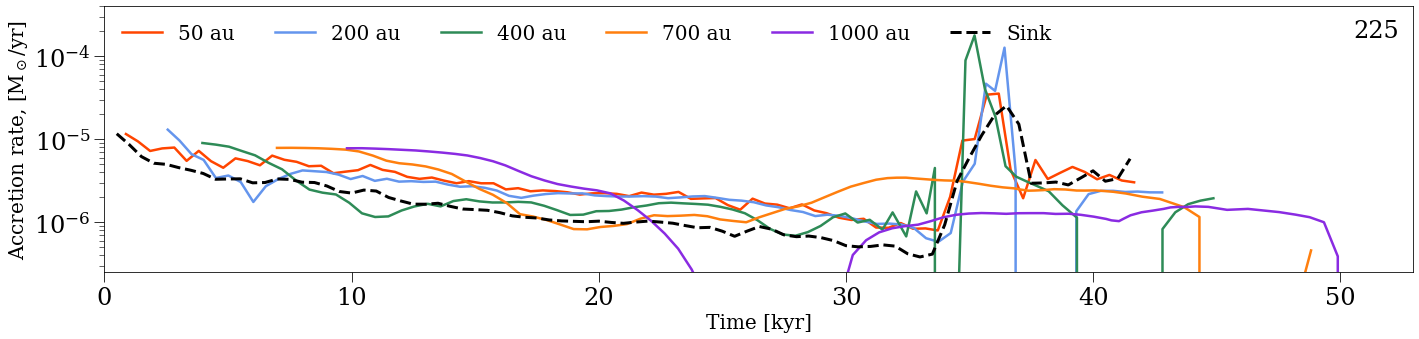

In [25]:
fig, axs = plt.subplots(figsize = (20, 5))


x_max = np.array([plot_data[sink]['time'][-1] + plot_data[sink]['t_ff'][-1,-1] for sink in plot_data.keys()]).max()

axs.set_xlabel('Time [kyr]', fontsize=20); axs.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=20), axs.set_xlim(0, x_max * 1e-3), axs.set_ylim(0.25e-6, 4e-4)
axs.tick_params(axis='x', labelsize=24); axs.tick_params(axis='y', labelsize=24)


for i, key in enumerate(list(plot_data[sink].keys())[:-4]):
    axs.semilogy((plot_data[sink]['time'] + plot_data[sink]['t_ff'][i])*1e-3, plot_data[sink][key], '-',  markersize = 3, label = f'{key} au', color = color_use[i], lw = 2.5); 
    #axs.semilogy((plot_data[sink]['time'] )*1e-3, plot_data[sink][key], '-',  markersize = 3, label = f'Infall sphere, {key} au', color = color_use[i], lw = 2.5); 
axs.semilogy((plot_data[sink]['time'])*1e-3, plot_data[sink]['M_dot'], '--',  markersize = 3, label = 'Sink', color = 'black', lw = 3); 
axs.tick_params(length = 5, which = 'minor'); axs.tick_params(length = 10, which = 'major')
axs.text(0.99, 0.95, sink_name, transform=axs.transAxes, ha='right', va='top', fontsize = 24)
axs.legend(frameon = False, ncol = len(list(plot_data[sink].keys())[:-4]) + 1, loc = 'upper left', prop = {'size':20});

#plt.suptitle('Accretion at sink and for several spheres', fontsize = 20,)
#
plt.tight_layout()
plt.savefig('/groups/astro/kxm508/codes/python_dispatch/plot_production/plots_for_michael/infall', dpi = 500, facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0)